<a href="https://colab.research.google.com/github/jana-nf/-7DaysOfCode-ml-Alura-Jana-nf/blob/main/_7DaysOfCode1_7MusicaSpotifyMLAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7DaysOfCode

Alura

Machine Learning

Vamos explorar os dados de músicas do Spotify?

Mas antes de iniciar essa exploração, você precisará executar a coleta e organização dos dados.

Baixe o datataset de músicas do Spotify disponível no Kaggle e realize a leitura e exploração em uma IDE.

Agora é fazer a análise exploratória dos dados, que é um processo importante para entender melhor os dados com os quais você estará trabalhando.

No caso dos dados de músicas do Spotify, ela pode nos ajudar a identificar padrões, tendências e relações entre as variáveis disponíveis.

Isso pode te fornecer insights valiosos sobre o que torna uma música popular no Spotify, como características musicais, duração da música, gênero musical, quais os artistas mais ouvidos e outros.

Através dessa análise inicial, você pode descobrir informações relevantes sobre os dados e ajudar a orientar a criação de modelos de Machine Learning mais eficazes para prever a popularidade das músicas no Spotify.

Identificar possíveis problemas nos dados, como valores faltantes ou inconsistências, coisas que precisam ser tratadas antes da criação do modelo.

Então, comece investigando os seus dados e gerando visualizações para identificar padrões ou estatísticas interessantes.

Você consegue ver quais são as 100 músicas mais populares?
Quais os artistas mais populares?
Dentre os gêneros musicais, quais são mais populares?

Como contar valores de alguma coluna, somá-los, fazer agrupamentos, visualizar a dimensão dos dados, tipos de cada coluna, identificar inconsistências, campos com valores nulos ou duplicados, etc.

Você vai perceber que essa base de dados possui características de músicas como, duração, danceabilidade, energia, modo, popularidade, velocidade, acústico, instrumentalização, e outros. Por exemplo, a danceabilidade é uma medida de quão adequada a música é para dançar, enquanto que a energia é uma medida de quão intensa e animada a música é.

E essas informações serão essenciais para o Spotify identificar padrões de músicas mais populares ou até mesmo recomendar músicas para os usuários com base em seus gostos musicais.

In [ ]:
pip install pandas-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [ ]:
#Lendo o dataset Spotify
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.shape

(114000, 21)

In [ ]:
df.shape[0]

114000

In [ ]:
df.shape[1]

21

In [ ]:
df.count

<bound method DataFrame.count of         Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.99

#Resolvendo o desafio!

##Quais as 100 músicas mais populares?

In [ ]:
musicas_mais_populares = df.sort_values(by='popularity', ascending=False).head(100)

In [ ]:
musicas_mais_populares

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68553,68553,4tYFy8ALRjIZvnvSLw5lxN,Bad Bunny;Rauw Alejandro,Un Verano Sin Ti,Party,90,227628,False,0.829,0.799,...,-5.389,1,0.0897,0.01510,0.000543,0.2420,0.471,97.013,4,latino
68673,68673,1797zYiX4cKosMH836X9Gt,Bad Bunny;Tony Dize,Un Verano Sin Ti,La Corriente,90,198367,True,0.663,0.786,...,-3.510,0,0.1950,0.22900,0.000000,0.2190,0.579,196.120,4,latino
79001,79001,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,...,-13.123,0,0.0550,0.72000,0.003140,0.0604,0.197,108.375,4,piano
20014,20014,7ef4DlsgrMEH11cDZd32M6,Calvin Harris;Dua Lipa,One Kiss (with Dua Lipa),One Kiss (with Dua Lipa),89,214846,False,0.791,0.862,...,-3.240,0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,4,dance


In [ ]:
musicas_mais_populares.to_csv('musicas_mais_populares.csv', index=False)

In [ ]:
musicas_mais_populares[['track_name','artists','popularity']]

,track_name,artists,popularity
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
81210,I'm Good (Blue),David Guetta;Bebe Rexha,98
89411,La Bachata,Manuel Turizo,98
...,...,...,...
68553,Party,Bad Bunny;Rauw Alejandro,90
68673,La Corriente,Bad Bunny;Tony Dize,90
79001,Running Up That Hill (A Deal With God),Kate Bush,90
20014,One Kiss (with Dua Lipa),Calvin Harris;Dua Lipa,89


##Quais os artistas mais populares?

In [ ]:
artistas_mais_populares = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

In [ ]:
artistas_mais_populares

,popularity
artists,
Sam Smith;Kim Petras,100.0
Bizarrap;Quevedo,99.0
Manuel Turizo,98.0
Bad Bunny;Chencho Corleone,97.0
Bad Bunny;Bomba Estéreo,94.5
Joji,94.0
Beyoncé,93.0
Harry Styles,92.0
Rema;Selena Gomez,92.0


In [ ]:
artistas_mais_populares = df.groupby('artists')['popularity'].mean().nlargest(10)

In [ ]:
artistas_mais_populares

,popularity
artists,
Sam Smith;Kim Petras,100.0
Bizarrap;Quevedo,99.0
Manuel Turizo,98.0
Bad Bunny;Chencho Corleone,97.0
Bad Bunny;Bomba Estéreo,94.5
Joji,94.0
Beyoncé,93.0
Harry Styles,92.0
Rema;Selena Gomez,92.0


##Dentre os gêneros mais musicais, quais são mais populares?

In [ ]:
generos_mais_populares = df.groupby('track_genre')['popularity'].mean().nlargest(10)

In [ ]:
generos_mais_populares

,popularity
track_genre,
pop-film,59.283
k-pop,56.896
chill,53.651
sad,52.379
grunge,49.594
indian,49.539
anime,48.772
emo,48.128
sertanejo,47.866


##Como contar valores de alguma coluna, somá-los, fazer a média, verificar tipos de cada coluna, identificar inconsistências, campos vazios e etc?

In [ ]:
#Contagem de valores únicos em uma coluna
df['track_genre'].value_counts()

,count
track_genre,
acoustic,1000
punk-rock,1000
progressive-house,1000
power-pop,1000
pop,1000
...,...
folk,1000
emo,1000
electronic,1000


In [ ]:
#Soma de valores em uma coluna numérica
df['popularity'].sum()

3789193

In [ ]:
#Média de valores em uma coluna numérica
df['popularity'].mean()

33.2385350877193

In [ ]:
#Tipos de dados de cada coluna
df.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [ ]:
#identificando valores nulos
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
#Identificando linhas duplicadas
df.duplicated().sum()

0

##Para aomplementar a análise, você pode criar algumas visualizações:

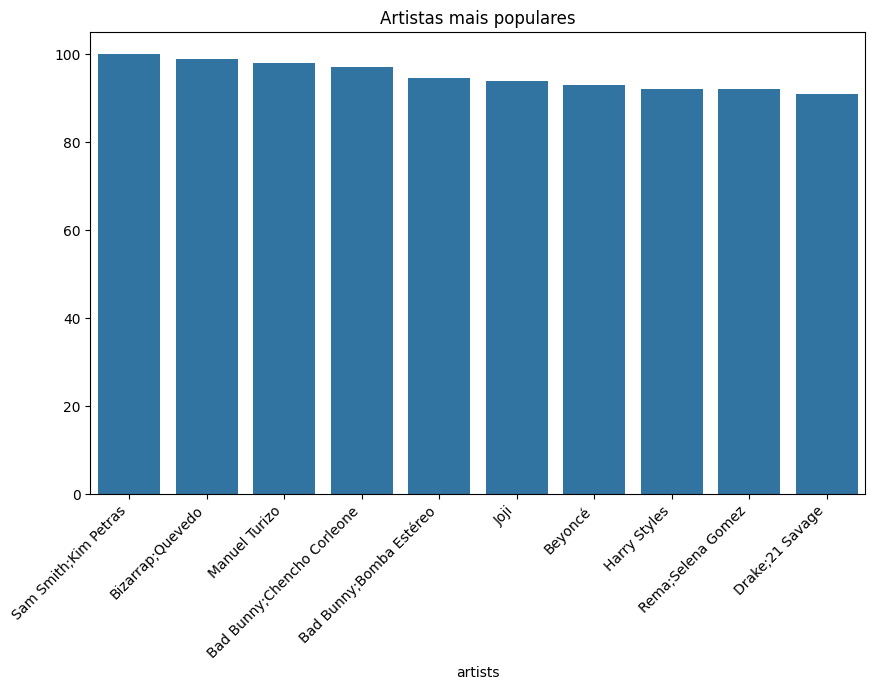

In [ ]:
#Gráficos de barras dos artistas mais populares
plt.figure(figsize=(10,6))
sns.barplot(x=artistas_mais_populares.index, y=artistas_mais_populares.values)
plt.title('Artistas mais populares')
plt.xticks(rotation=45, ha='right')
plt.show()

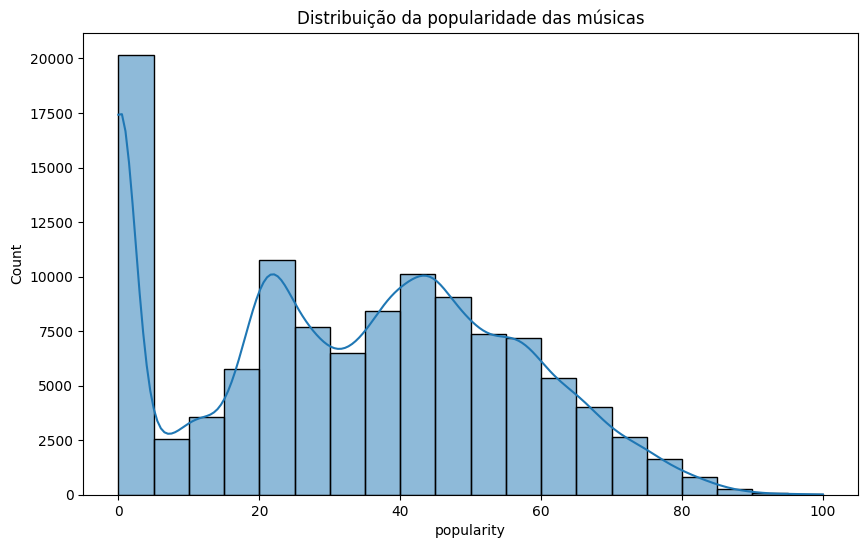

In [ ]:
#Histograma da popularidade das músicas
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribuição da popularidade das músicas')
plt.show()

In [ ]:
#Teste T (Teste de Hipótese)
#Este teste é usado para comparar a média de uma amostra com um valor conhecido

#Dados da amostra
df = np.array([6,7,8,9,10,11,12,13,14,15])

In [ ]:
# Assuming 'original_df' was the name of your original DataFrame before reassignment
# If you don't have it anymore, you'll need to reload your data into a DataFrame
sample_data = df
t_statistic, p_value = stats.ttest_1samp(sample_data, popmean=50)  # Compare to a population mean of 50
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -41.25640446150039
P-value: 1.4390588735673967e-11


In [ ]:
#Interpretando os resultados
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula. A média da amostra é significativamente diferente de 50.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a média da amostra é significativamente diferente de 50.")

Rejeitamos a hipótese nula. A média da amostra é significativamente diferente de 50.


In [ ]:
#Teste T de duas amostras independentes
#Dados das amostras
amostra1 = np.array([1,2,3,4,5])
amostra2 = np.array([6,7,8,9,10])

In [ ]:
#Realizando o test t
t_statistic, p_value = stats.ttest_ind(amostra1, amostra2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -5.0
P-value: 0.001052825793366539


In [ ]:
#Interpretando os resultados
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula. As médias das amostras são significativamente diferentes.")
    print("A diferença entre as médias é estatísticamente significativa.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias das amostras são significativamente diferentes.")

Rejeitamos a hipótese nula. As médias das amostras são significativamente diferentes.
A diferença entre as médias é estatísticamente significativa.


In [ ]:
#Teste ANOVA

#Dados das amostras
amostra1 = np.array([1,2,3,4,5])
amostra2 = np.array([6,7,8,9,10])
amostra3 = np.array([11,12,13,14,15])

In [ ]:
#Realizando o teste ANOVA
f_statistic, p_value = stats.f_oneway(amostra1, amostra2, amostra3)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 50.0
P-value: 1.5127924217375409e-06


In [ ]:
#Interpretando os resultados
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula. As médias das amostras são significativamente diferentes.")
    print("Pelo menos uma das médias é diferente das outras.")
    print("Pelo menos uma das médias é diferente das outras.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as médias das amostras são significativamente diferentes.")

Rejeitamos a hipótese nula. As médias das amostras são significativamente diferentes.
Pelo menos uma das médias é diferente das outras.
Pelo menos uma das médias é diferente das outras.


In [ ]:
#Teste Qui-quadrado

#Tabela de Contingência
tabela_contingencia = np.array([[10, 20, 30], [6, 9, 17]])

In [ ]:
#Realizando o teste Qui-quadrado
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(tabela_contingencia)
print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square statistic: 0.27157465150403504
P-value: 0.873028283380073


In [ ]:
#Imprimindo os resultados
print("Estatistica Qui-quadrado:", chi2_statistic)
print("P-value:", p_value)
print("Graus de Liberdade:", dof)
print("Valores Esperados:")
print(expected)

Estatistica Qui-quadrado: 0.27157465150403504
P-value: 0.873028283380073
Graus de Liberdade: 2
Valores Esperados:
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [ ]:
#Interpretando os resultados
alpha = 0.05

if p_value < alpha:
    print("Rejeitamos a hipótese nula. Existem relações significativas entre as variáveis.")
    print("Existem relações entre as variáveis.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as variáveis são independentes.")

Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que as variáveis são independentes.
